# Temperature Fit

Here I'll demonstrate how to do an exponential fit that we can apply to our temperature data. I'll use random data for the example, and it'll be up to you to perform the fit on the actual temperature data from our black hole simulation.

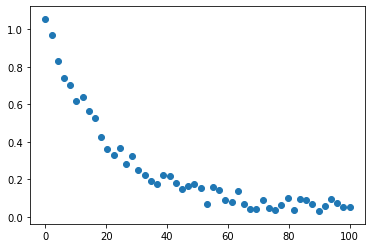

In [45]:
# Generating random data
# You don't need to do this part in your code! This is just for the example.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100)
data = np.exp(-0.05 * x)+ 0.1*np.random.random(len(x))
#data[:20] = (0.5 + np.random.random(20))*np.exp(-np.random.random(20)*x[:20])

plt.scatter(x, data)
plt.show()

Here we have some data that looks like an exponential falloff! The cool thing about exponential falloff is that if you plot it in logspace (i.e., increments of 10 on the y axis), you get...

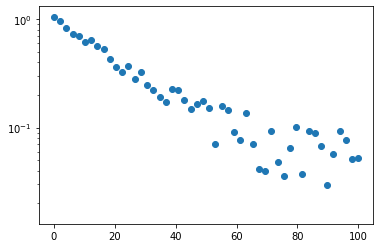

In [46]:
plt.scatter(x, data)
plt.yscale('log')
plt.show()

A line! Well, mostly. I've added in some noise, which shows up more where the function is small. But, we can still certainly fit this data with a line --- all we have to do is take the log of it first. 

In [47]:
import numpy as np

logged_data = np.log10(data)

# Use numpy polyfit to make a 1st order polynomial fit --- a "linear" fit!
z = np.polyfit(x, logged_data, 1)

In [48]:
print(z)

[-0.01323254 -0.13624689]


These two numbers are the coefficients of the line. You might recognize them better like this:

y = mx + b

y = (-0.01323254)x + (-0.13624689)

This is the equation of the line that best describes our data. Let's try plotting it to see how well we did. First we'll need to actually make these coefficients into the equation for a line.

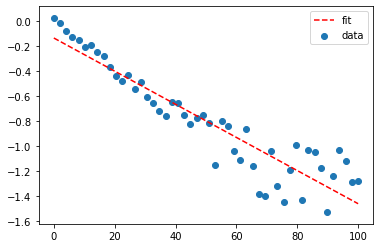

In [68]:
m = z[0] # = -0.01323254
b = z[1] # = -0.13624689

plt.scatter(x, logged_data, label='data')
plt.plot(x, m*x + b, 'r--', label='fit')
plt.legend()
plt.show()

So, we've taken data that exponentially decays, we've converted it to a linear trend by taking the log, and we've now produced a linear fit that describes the data pretty well. But how do we get it back into log space?

We just need to do the opposite of a log, which is an exponent.

10^(y) = 10^(mx + b)

10^(y) = 10^b * 10^(mx)

So, to get a fit that matches our original (un-logged) data, we'll need to use a fit like this:

`log_fit = 10**(-0.13624689) * 10**(-0.01323254 * x)`

Let's try that and see how it does against the original data.

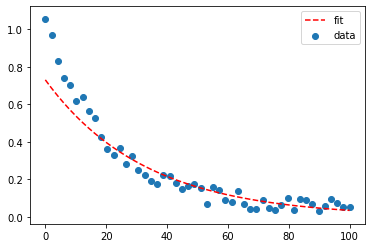

In [69]:
log_fit = 10**(b) * 10**(m * x)

plt.scatter(x, data, label='data')
plt.plot(x, log_fit, 'r--', label='fit')
plt.legend()
plt.show()

That's pretty good! Now, in the case of our actual data, we have a bunch of points at small radii that we don't want to include in our fit. So, all we have to do is remove these data points when we're calculating our `m` and `b` fit coefficients. Here's a code snippet that does this:

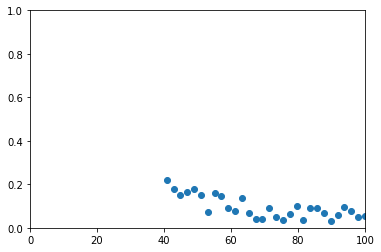

In [70]:
# This grabs everything *after* the 20th data point
trimmed_x = x[20:]
trimmed_data = data[20:]

# Check to make sure we didn't cut too much out
# If you cut too much or didn't cut enough, change the number "20" to something else in the lines above.
plt.scatter(trimmed_x, trimmed_data)
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.show()

In [71]:
# Now we want to do our linear fit on the logged data, just as before -- but this time we use only the trimmed data for the fit.
trimmed_z = np.polyfit(trimmed_x, np.log10(trimmed_data), 1)
print(trimmed_z)

[-0.00900424 -0.4481945 ]


Now that we have these coefficients, we can actually use them to fit *all* the data. We've simply ignored the contribution of the first 20 data points to the fit. However, we can still overlay the line in that location.

In [72]:
m = trimmed_z[0] # Gets the first number from trimmed_z, which is our "m"
b = trimmed_z[1] # gets the second number from trimmed_z, which is our "b"
trimmed_fit = 10**b * 10**(m*x)

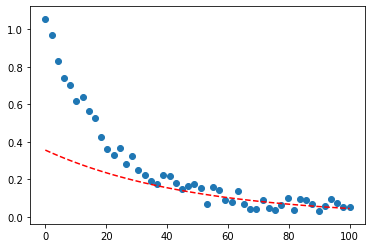

In [73]:
plt.scatter(x, data, label='data')
plt.plot(x, trimmed_fit, 'r--', label='trimmed fit')
plt.show()

You can now see pretty clearly that the fit is ignoring the early data points and is optimizing itself to match the data points further out more closely. This is what we'll probably want for our temperature fit as well! Here's a reminder about how to load in that data:

In [74]:
r_data, tgas_data = np.load("/home/connor/Documents/thindisk/data/exported_data_tgas.npy")

So, your `r_data` will replace `x` in this example, and your `tgas_data` will replace `data`. Give it a try!